<a href="https://colab.research.google.com/github/DARoSLab/CS403-Intro-Robotics/blob/main/Lecture/Lecture6_Coordinate_transformation-lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# python libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import animation
from IPython.display import HTML
from math import pi
import plotly.graph_objects as go
import mpl_toolkits.mplot3d.axes3d as p3
import scipy

# Q.1 Make a function that converts XYZ Euler angle representation to SO(3) [5 pts]
Complete the fuction returning the orientation matrix (SO(3)) given the Euler ZYX angles. 

In [17]:
def ZYX_to_SO3(th_z, th_y, th_x):
  # Fill your code here
  Rz = np.array([[np.cos(th_z), -np.sin(th_z), 0],
                 [np.sin(th_z), np.cos(th_z), 0],
                 [0, 0, 1]])
  Ry = np.array([[np.cos(th_y), 0 ,  np.sin(th_y)],
                 [0, 1, 0],
                 [-np.sin(th_y),0, np.cos(th_y)]])  
  Rx = np.array([[],
                 [],
                 []])
  SO3 =  #make sure you use matrix multiplication not element wise multiplication "*"
  return SO3 

Test function 

In [21]:
def test_ZYX_to_SO3():
  zyx_test = np.array([[0.3, 0.2, 0.7],
                       [0.7, np.pi, np.pi/2],
                       [np.pi/3, 0, 0]])
  soln = np.array([[[ 0.93629336, -0.10375634,  0.33554338],
                    [ 0.28962948,  0.76850419, -0.57054017],
                    [-0.19866933,  0.63137622,  0.74959627]], 
                   [[-7.64842187e-01,  5.42191972e-17,  6.44217687e-01],
                    [-6.44217687e-01,  1.25726990e-16, -7.64842187e-01],
                    [-1.22464680e-16, -1.00000000e+00, -6.12323400e-17]], 
                   [[ 0.5      , -0.8660254,  0.       ],
                    [ 0.8660254,  0.5      ,  0.       ],
                    [ 0.       ,  0.       ,  1.       ]]])
  res = []
  for test in zyx_test:
    res.append(ZYX_to_SO3(*test))
  res = np.array(res) 
  print(res)
  if np.allclose(res, soln):
    print('your implementation is correct')
  else:
    print('In correct implementation try again')



In [22]:
test_ZYX_to_SO3()

[[[ 9.36293364e-01 -1.03756342e-01  3.35543378e-01]
  [ 2.89629478e-01  7.68504187e-01 -5.70540166e-01]
  [-1.98669331e-01  6.31376224e-01  7.49596265e-01]]

 [[-7.64842187e-01  5.42191972e-17  6.44217687e-01]
  [-6.44217687e-01  1.25726990e-16 -7.64842187e-01]
  [-1.22464680e-16 -1.00000000e+00 -6.12323400e-17]]

 [[ 5.00000000e-01 -8.66025404e-01  0.00000000e+00]
  [ 8.66025404e-01  5.00000000e-01  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]]
your implementation is correct


# Q.2 Visualize the following frame orientations [5 pts]
\begin{align}
        (a) ZYX &= (0.3, 0.2, 0.7)\ [rad]\\
        (b) ZYX &= (0.7, \pi, \pi/2)\ [rad]\\
        (c) ZYX &= (π/3, 0, 0)\ [rad]
\end{align}

In this problem, you will use the function implemented above to draw the frames coincide with the given Euler angles.




In [70]:
def draw_vector(ax, origin, end, **kwargs):
  # ax.plot([origin[0], end[0]],[origin[1], end[1]], [origin[2], end[2]], **kwargs) 
  ax.quiver(*origin, *(end-origin), **kwargs)

In [71]:
def draw_axes(ax=None, R=np.eye(3), offset = [0,0,0], draw_global_frame=True, **kwargs):
  """
  R: rotation matrix 3x3
  offset: origin offset 3x1
  """
  offset = np.array(offset)
  x0 = np.zeros(3)
  y0 = np.zeros(3)
  z0 = np.zeros(3)
  
  x0 += offset
  y0 += offset
  z0 += offset

  x0[0] += 1
  y0[1] += 1
  z0[2] += 1


  if ax is None:
    fig= plt.figure(figsize=(10,10))
    ax = p3.Axes3D(fig)
  if draw_global_frame:
    draw_vector(ax, offset, x0, lw=8, color = 'r', label='x0 global', alpha=0.2)
    draw_vector(ax, offset, y0, lw=8, color = 'g', label='y0 global', alpha=0.2)
    draw_vector(ax, offset, z0, lw=8, color = 'b', label='z0 global', alpha=0.2)

  # Fill your code to draw a frame
  x_e =  # x-axis arrow head
  y_e =  # y
  z_e =  # z

  draw_vector(ax, offset, x_e, lw=8, color = 'r', label='x local')
  draw_vector(ax, offset, y_e, lw=8, color = 'g', label='y local')
  draw_vector(ax, offset, z_e, lw=8, color = 'b', label='z local')

  ax.set_xlim([-2, 2])
  ax.set_ylim([-2, 2])
  ax.set_zlim([-2, 2])
  
  return ax


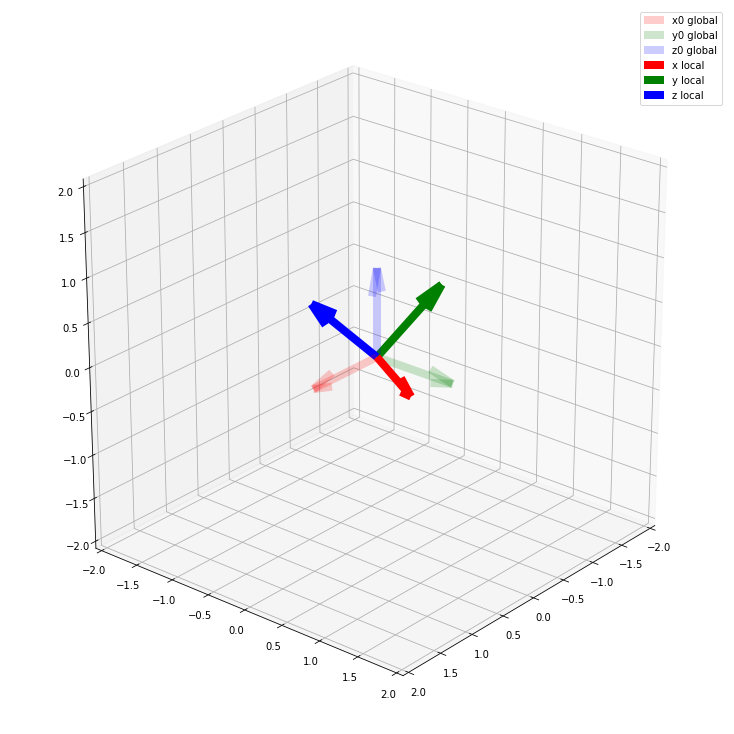

In [38]:
#(a) [np.pi/3, np.pi/4, 0], Draw the frame (a) along with global frame

fig_a= plt.figure(figsize=(10,10))
ax_a = p3.Axes3D(fig_a)

# Fill your code (Make rotation matrix)


ax_a = draw_axes(ax=ax_a, R=R_a, offset=[0, 0, 0])
ax_a.legend()
ax_a.view_init(25, 40)

fig_a.show()


# Q.3 Make a function that converts ZYX Euler angle representation to Quaternion representation [15 pts]

In [77]:
def vee(R):
  return np.array([R[2,1], R[0, 2], R[1, 0]])

def SO3_to_so3(R):
  omega, theta = None, 0
  if np.allclose(R, np.eye(3)): # if R = identity
    pass

  elif np.abs(np.trace(R)+1)<1e-5: # if theta = pi
    theta = np.pi
    r13 = R[0,2]
    r23 = R[1,2]
    r33 = R[2,2]
    omega = np.array([r13,r23, 1+r33])
    omega *= (1./np.sqrt(2*(1+r33)))

  else:  # Fill your code (Other normal cases)


  return omega, theta

In [74]:
def ZYX_to_Quaternion(th_z, th_y, th_x):
  R= ZYX_to_SO3(th_z, th_y, th_x)
  omega, theta = SO3_to_so3(R)
  quaternion = np.zeros(4)

  if omega is None:
    quaternion[0] = 1.0
    return quaternion

  quaternion[0] = np.cos(theta/2.)
  quaternion[1] = np.sin(theta/2.)*omega[0]
  quaternion[2] = np.sin(theta/2.)*omega[1]
  quaternion[3] = np.sin(theta/2.)*omega[2]
  
  return quaternion

In [75]:
def test_ZYX_to_Quaternion():
  zyx_test = np.array([[0.3, 0.2, 0.7],
                       [0.7, np.pi, np.pi/2],
                       [np.pi/3, 0, 0]])
  # print(zyx_test)
  soln = np.array([[ 0.92929998,  0.32333918,  0.14371374,  0.10582853],
                  [ 0.24246536, -0.24246536,  0.66423682, -0.66423682],
                  [ 0.8660254,   0.,          0.,          0.5       ]])
  res = []
  for test in zyx_test:
    res.append(ZYX_to_Quaternion(*test))
  res = np.array(res) 
  if np.allclose(res, soln):
    print('your implementation is correct')
  else:
    print('In correct implementation try again')

In [76]:
test_ZYX_to_Quaternion()

your implementation is correct


# Q.4 Rotate the following vectors with the rotation matrices in Q.1
\begin{align}
%p_1&=(0.5, 0.3, 0.1)\\
p&=(1, 0, 0)\\
\end{align}
Visualize it and provide the coordinate of the rotated vector in both local and global coordinates.

In [41]:
p = np.array([1, 0., 0.])

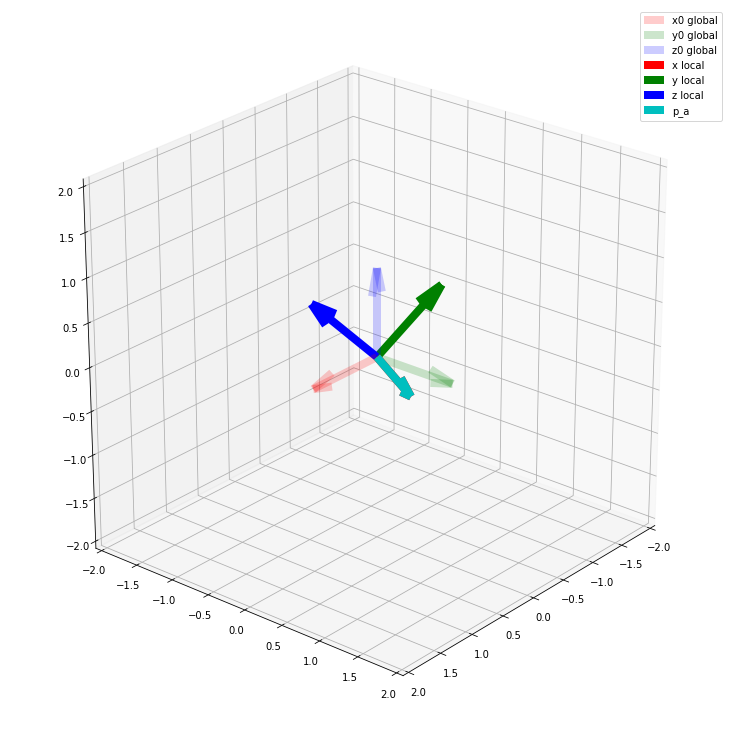

In [42]:
# Fill your code (find p_a)


fig_a= plt.figure(figsize=(10,10))
ax_a = p3.Axes3D(fig_a)
ax_a = draw_axes(ax=ax_a, R=R_a)

draw_vector(ax_a, [0, 0, 0], p_a, color='c', label='p_a', lw=8)
ax_a.legend()
ax_a.view_init(25, 40)

fig_a.show()

Read the vector described in the local frame and the global frame and explain why the values read in the local frame do not change

# Q.5 (a) Integrate constant anglar velocity of $ω=[0, 0, 1.5]\ [rad/s]$ for 1.5 sec starting from the following orientation
\begin{equation}R = \begin{bmatrix}
      0 &1 &0 \\
      -1& 0& 0 \\
      0& 0 &-1
      \end{bmatrix}.
\end{equation}
# Q.5 (b) Animate and Compare $e^{[\omega t]} R$ and $Re^{[\omega t]}$.

**Hint: for matrix exponential operation use scipy.linalg.expm function**

In [49]:
def skew_sym_matrix(a):
  return np.array([[0, -a[2], a[1]],
                   [a[2], 0, -a[0]],
                   [-a[1], a[0], 0]])

In [84]:
def draw_axes_mp(Rs, **kwargs):
  """
  Rs: a list of rotation matrices
  """
  fig= plt.figure(figsize=(10,10))
  ax = p3.Axes3D(fig)

  offset = np.array([0, 0, 0])
  x0 = np.zeros(3)
  y0 = np.zeros(3)
  z0 = np.zeros(3)
  
  x0[0] += 1
  y0[1] += 1
  z0[2] += 1

  draw_vector(ax, offset, x0, lw=8, color = 'r', label='x0 global', alpha=0.2)
  draw_vector(ax, offset, y0, lw=8, color = 'g', label='y0 global', alpha=0.2)
  draw_vector(ax, offset, z0, lw=8, color = 'b', label='z0 global', alpha=0.2)

  x_axis,  = ax.plot([0, 1], [0, 0], [0, 0], lw=8, color='r', label='x')
  y_axis,  = ax.plot([0, 0], [0, 1], [0, 0], lw=8, color='g', label='y')
  z_axis,  = ax.plot([0, 0], [0, 0], [0, 1], lw=8, color='b', label='z')
  ax.set_xlim([-2, 2])
  ax.set_ylim([-2, 2])
  ax.set_zlim([-2, 2])
  ax.legend()
  ax.view_init(25, 40)


  def drawFrame(k):  
    x_e = Rs[k][:, 0]
    y_e = Rs[k][:, 1]
    z_e = Rs[k][:, 2]
    x_axis.set_data([0, x_e[0]], [0, x_e[1]]) 
    x_axis.set_3d_properties([0, x_e[2]])
    y_axis.set_data([0, y_e[0]], [0, y_e[1]]) 
    y_axis.set_3d_properties([0, y_e[2]])
    z_axis.set_data([0, z_e[0]], [0, z_e[1]]) 
    z_axis.set_3d_properties([0, z_e[2]])
    
    # return x0_axis, y0_axis, z0_axis, x_axis, y_axis, z_axis,
    return x_axis, y_axis, z_axis,
    
  if 'frames' in kwargs:
    anim = animation.FuncAnimation(fig, drawFrame, frames=kwargs['frames'], interval=1000, blit=True)
  else:
    anim = animation.FuncAnimation(fig, drawFrame, frames=10, interval=1000, blit=True)   
  return anim


In [85]:
omega = np.repeat(np.array([0, 0, 1.5]).reshape(1,-1), 10, axis=0)
delta_t = np.linspace(0, 1.5, 10).reshape(-1, 1)
R = np.array([[0, 1, 0],
              [0, 0, -1],
              [-1, 0, 0]])
omega_t = omega*delta_t
exp_omega_t = []

# Fill your code (find exp (omega * t))
for o_t in omega_t:

  exp_omega_t.append(e_o_t_hat)

e_t_np = np.array(exp_omega_t)

# Fill your code (find explicit and implicit rotation)


**Animate $e^{[\omega t]} R$**

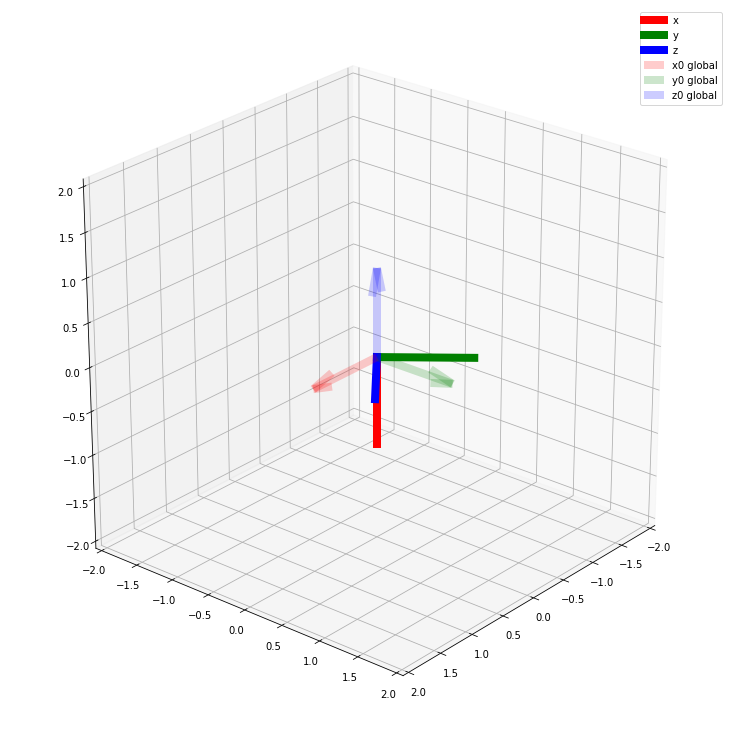

In [86]:
anim = draw_axes_mp(explicit_R, frames=10)
HTML(anim.to_html5_video())

**Animate $Re^{[\omega t]}$**

#Q.6 Make a function that converts position and ZYX orientation representation to SE(3) [10 pts]. 

In [80]:
# complete your code
def POS_ZYX_to_SE3(x, y, z, th_z, th_y, th_x):

  return SE3 

In [81]:
def test_POS_ZYX_to_SE3():
  zyx_test = np.array([[0.3, 0.2, 0.7, 0.5, 0.2, 1.2],
                       [0.5, 0.6, 1.8, 0.7, np.pi, np.pi/2],
                       [0.1, 0.0, 2, np.pi/3, 0, 0]])
  soln = np.array([[[ 8.60089338e-01, -1.12237211e-02,  5.10019959e-01,  3.00000000e-01],
                    [ 4.69868947e-01,  4.06772914e-01, -7.83427705e-01,  2.00000000e-01],
                    [-1.98669331e-01,  9.13460357e-01,  3.55134724e-01,  7.00000000e-01],
                    [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]],
                  [[-7.64842187e-01,  5.42191972e-17,  6.44217687e-01,  5.00000000e-01],
                    [-6.44217687e-01,  1.25726990e-16, -7.64842187e-01,  6.00000000e-01],
                    [-1.22464680e-16, -1.00000000e+00, -6.12323400e-17,  1.80000000e+00],
                    [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]],
                  [[ 5.00000000e-01, -8.66025404e-01,  0.00000000e+00,  1.00000000e-01],
                    [ 8.66025404e-01,  5.00000000e-01,  0.00000000e+00,  0.00000000e+00],
                    [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00,  2.00000000e+00],
                    [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]]])
  res = []
  for test in zyx_test:
    res.append(POS_ZYX_to_SE3(*test))
  res = np.array(res) 
  if np.allclose(res, soln):
    print('your implementation is correct')
  else:
    print('In correct implementation try again')

In [62]:
test_POS_ZYX_to_SE3()

your implementation is correct


#Q.7 Using the following relationships between frames, find the SE(3) that corresponds to $frame{\{i\}}→{\{0\}} \ ∀\  i \in \{0, 1, 2, 3\}$ and draw them on the same plot [20 pts]. 

> > * frame${\{0\}}: position=(0, 0, 0),\  ZYX=(0, 0, 0) $
> > * frame${\{1\}}→{\{0\}}: position=(0.4, 0.0, 0.4),\  ZYX=(0, \theta_1, 0) $
> > * frame${\{2\}}→{\{1\}}: position=(0.7, 0.0, 0.8),\  ZYX=(0, \theta_2, 0) $
> > * frame${\{3\}}→{\{2\}}: position=(1.0, 0.0, 0.4),\  ZYX=(0, \theta_3, 0) $

For this question use $\theta_1=\theta_2=\theta_3=0$

In [89]:
def draw_SE3(ax, T):
  ax = draw_axes(ax, R=T[:3, :3], offset = T[:-1, 3], draw_global_frame=False)
  return ax

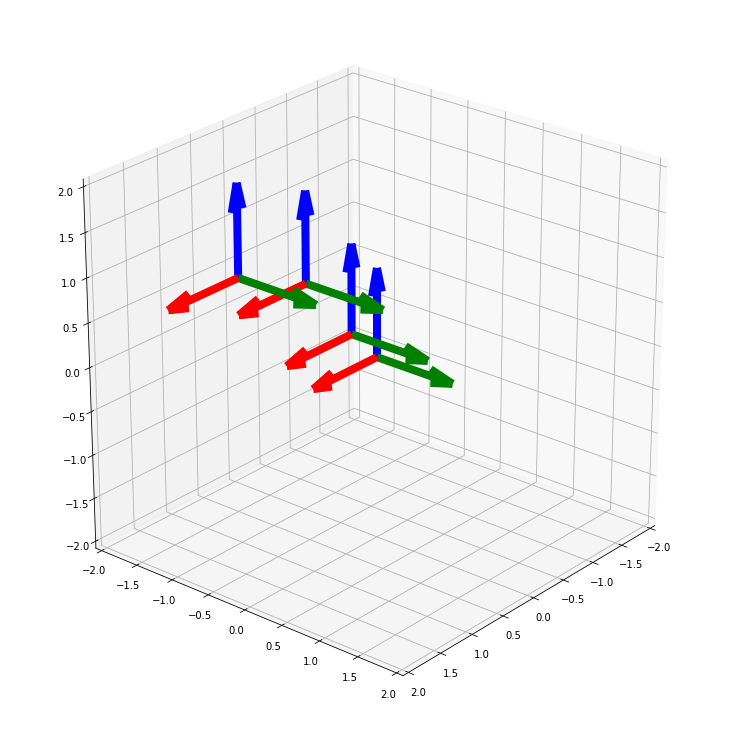

In [90]:
T0 = POS_ZYX_to_SE3(-0.0, 0.0, 0.0, 0., 0.0, 0.0)
T0_1 = POS_ZYX_to_SE3(0.4, 0.0, 0.4, 0., 0.0, 0.0)
T1_2 = POS_ZYX_to_SE3(.7, 0.0, 0.8, 0., -0.0, 0.0)
T2_3 = POS_ZYX_to_SE3(1., 0.0, 0.4, -0., 0.0, 0.0)

# Fill yours
T0_2 = 
T0_3 = 


fig_T1= plt.figure(figsize=(10,10))
ax = p3.Axes3D(fig_T1)
ax.view_init(25, 40)

ax = draw_SE3(ax, T0)
ax = draw_SE3(ax, T0_1)
ax = draw_SE3(ax, T0_2)
ax = draw_SE3(ax, T0_3)

# Q.8 In this question, the pitch angles in Q.6 change over time using the following rule
\begin{align}
\theta_1(t) &= sin(ωt)\\
\theta_2(t) &= sin(ωt + 0.3)\\
\theta_3(t) &= 0.
\end{align}
where $ω = 0.5\ [rad/s]$. Animate the frames $t \in [0, 1.5]$ sec.

In [104]:
N = 50
omega = 2.5
t = np.linspace(0, 1.5, N)
th_1_hist  = np.sin(omega*t)
th_2_hist  = np.sin(omega*t + 0.3)
th_3_hist  = 0*np.sin(omega*t)
T_hist = np.zeros((N, 4, 4, 4))
for i in range(N):
  T0 = POS_ZYX_to_SE3(-0.0, 0.0, 0.0, 0., 0.0, 0.0)
  # Fill yours
  
  T_hist[i, 0, :, :] = T0
  T_hist[i, 1, :, :] = T0_1
  T_hist[i, 2, :, :] = T0_2
  T_hist[i, 3, :, :] = T0_3


In [105]:
def animate_frames(T_hist, **kwargs):
  """
  T_hist: a list of SE(3) matrices (N, n_frames, 4, 4)
  """
  fig= plt.figure(figsize=(10,10))
  ax = p3.Axes3D(fig)

  # x0_axis,  = ax.plot([0, 1], [0, 0], [0, 0], lw=3, color = 'r')
  # y0_axis,  = ax.plot([0, 0], [0, 1], [0, 0], lw=3, color = 'g')
  # z0_axis,  = ax.plot([0, 0], [0, 0], [0, 1], lw=3, color = 'b')
  N, n_frames, _, _ = T_hist.shape
  x_axis_list = []
  y_axis_list = []
  z_axis_list = []
  
  for i in range(n_frames):
    x_axis,  = ax.plot([0, 1], [0, 0], [0, 0], lw=8, color='r')
    y_axis,  = ax.plot([0, 0], [0, 1], [0, 0], lw=8, color='g')
    z_axis,  = ax.plot([0, 0], [0, 0], [0, 1], lw=8, color='b')
    x_axis_list.append(x_axis)
    y_axis_list.append(y_axis)
    z_axis_list.append(z_axis)
    
  ax.set_xlim([-2, 2])
  ax.set_ylim([-2, 2])
  ax.set_zlim([-2, 2])
  ax.legend()
  ax.view_init(25, 40)


  def drawFrame(k):  
    for i in range(n_frames):
      T = T_hist[k, i, :, :]
      R=T[:3, :3]
      offset = T[:-1, 3]
      x_e = R[:, 0] + offset
      y_e = R[:, 1] + offset
      z_e = R[:, 2] + offset

      x_axis_list[i].set_data([offset[0], x_e[0]], [offset[1], x_e[1]]) 
      x_axis_list[i].set_3d_properties([offset[2], x_e[2]])
      y_axis_list[i].set_data([offset[0], y_e[0]], [offset[1], y_e[1]]) 
      y_axis_list[i].set_3d_properties([offset[2], y_e[2]])
      z_axis_list[i].set_data([offset[0], z_e[0]], [offset[1], z_e[1]]) 
      z_axis_list[i].set_3d_properties([offset[2], z_e[2]])
    return x_axis_list + y_axis_list + z_axis_list
    
  if 'frames' in kwargs:
    anim = animation.FuncAnimation(fig, drawFrame, frames=kwargs['frames'], interval=1000, blit=True)
  else:
    anim = animation.FuncAnimation(fig, drawFrame, frames=10, interval=1000, blit=True)   
  return anim


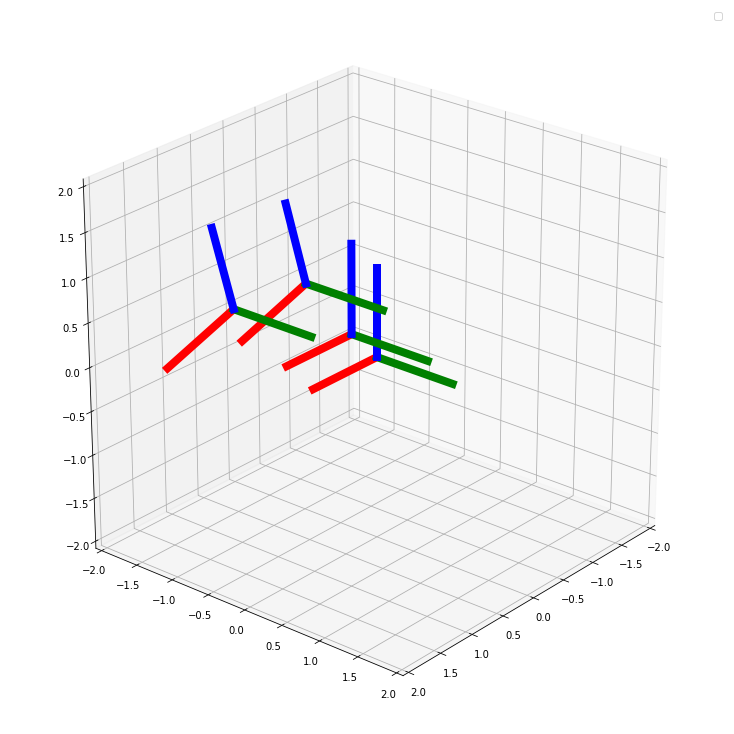

In [107]:
anim = animate_frames(T_hist, frames=50)
HTML(anim.to_html5_video())